In [1]:
import pandas as pd
#from google.colab import drive
#drive.mount('/content/drive')

# Fetch preprocessed data
data = 'keywords1.csv'

model_data = pd.read_csv(data)
model_data.head()

,book_title,keywords
0,the_hunger_games,suzanne_collins katniss winning hunger lottery...
1,harry_potter_and_the_order_of_the_phoenix,j.k._rowling mary_grandpré harry hogwarts terr...
2,to_kill_a_mockingbird,harper_lee mockingbird literature pulitzer nov...
3,twilight,stephenie_meyer cullen vampire vampires bella ...
4,the_book_thief,markus_zusak liesel jewish german book war


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = 'word',
                        min_df=1,
                        max_df = 0.99,
                        stop_words="english",
                        encoding = 'utf-8', 
                        token_pattern=r"(?u)\S\S+")
tfidf_encoding = tfidf.fit_transform(model_data["keywords"])

In [3]:
print(tfidf.get_feature_names_out()[1:100])

['1666' '1726' '1776' '1815' '1818' '1832' '1847' '1850s' '1854' '1859'
 '1879' '1895' '1903' '1914' '1920s' '1921' '1922' '1925' '1939' '1940s'
 '1941' '1942' '1943' '1944' '1954' '1956' '1957' '1959' '1960' '1981'
 '1984' '1988' '2045' '451' '747' 'a.a._milne' 'a.s._byatt' 'a.w._wheen'
 'aarons' 'abandoned' 'abbey' 'abby' 'abducted' 'abel' 'abernathy'
 'abhorsen' 'abigail' 'abilities' 'abortion' 'abraham_verghese' 'abridged'
 'absalom' 'absurd' 'abuse' 'ace' 'acheron' 'achieve' 'achilles' 'ackroyd'
 'actor' 'adam' 'adam_long' 'adams' 'addiction' 'adolescence' 'adolescent'
 'adored' 'adrienne' 'adventure' 'adventurenarnia' 'adventurer'
 'adventures' 'advice' 'aelin' 'aeneas' 'aeneid' 'affair' 'affairs'
 'afghan' 'afghanistan' 'africa' 'african' 'afterlife' 'afterworld'
 'agatha' 'agatha_christie' 'ages' 'agrarian' 'aiden' 'airman' 'airplanes'
 'aislinn' 'aladdin' 'alagaësia' 'alan_moore' 'alan_myers' 'alan_paton'
 'alan_r._clarke' 'alan_shelston']


In [4]:
tfidf_df = pd.DataFrame(tfidf_encoding.toarray(), index=model_data["book_title"], columns=tfidf.get_feature_names_out())

# Sort maximum tf-idf total score
tfidf_df["total"]= tfidf_df.sum(axis=1)
tfidf_df = tfidf_df.sort_values("total", ascending=False)
del tfidf_df["total"]

In [5]:
# Leave first few words containing years
tfidf_df_preview = tfidf_df.iloc[:,25:].copy()

#Fix 100 to 0
tfidf_df_preview = tfidf_df_preview.stack().reset_index()
tfidf_df_preview = tfidf_df_preview.rename(columns={0:'tfidf', 'book_title': 'book','level_1': 'term'})
tfidf_df_preview = tfidf_df_preview.sort_values(by=['book','tfidf'], ascending=[True,False]).groupby(['book']).head(10)
display(tfidf_df_preview)

,book,term,tfidf
2501168,'salem's_lot,terrified,0.446062
2498201,'salem's_lot,away,0.420972
2500820,'salem's_lot,salem,0.420972
2501086,'salem's_lot,streets,0.420972
2501250,'salem's_lot,town,0.420972
...,...,...,...
3036457,zen_and_the_art_of_motorcycle_maintenance:_an_...,book,0.228790
3036060,zen_and_the_art_of_motorcycle_maintenance:_an_...,1954,0.000000
3036061,zen_and_the_art_of_motorcycle_maintenance:_an_...,1956,0.000000
3036062,zen_and_the_art_of_motorcycle_maintenance:_an_...,1957,0.000000


In [6]:
def process_word_matrix(word_vec):
    # Remove underscores in terms
    word_vec.term = word_vec.term.str.replace('_',' ')

    # Remove terms with zero tfidf score
    word_vec = word_vec[word_vec.tfidf > 0]
    
    return word_vec

tfidf_vec = process_word_matrix(tfidf_df_preview.copy())    



def findBookWithSimilarTerm(term):
  res = set()
  for i in range(len(tfidf_vec)):
    if tfidf_vec.iloc[i]['term'] == term or tfidf_vec.iloc[i]['term'] in term or term in tfidf_vec.iloc[i]['term']:
      res.add(tfidf_vec.iloc[i]['book'])
  return res

# print(findBookWithSimilarTerm("novels"))

def findBookWithListofSimilarTerms(listTerm):
  result = set()
  for term in listTerm:
    tempList = findBookWithSimilarTerm(term)
    result = result.union(tempList)
  return result
  
print(findBookWithListofSimilarTerms(["vampire", "john", "universe"]))

{'dead_and_gone', 'a_brief_history_of_time', 'dear_john', 'dead_until_dark', 'living_dead_in_dallas', 'the_awakening_/_the_struggle', "the_pilgrim's_progress", 'the_dispossessed', 'the_twilight_collection', 'watchmen', 'blue_bloods', 'a_time_to_kill', "alice's_adventures_in_wonderland_&_through_the_looking-glass", 'the_fault_in_our_stars', 'of_mice_and_men', 'lover_revealed', 'i_am_legend_and_other_stories', 'night_world,_no._1', 'paradise_lost', 'the_hiding_place:_the_triumphant_true_story_of_corrie_ten_boom', 'a_confederacy_of_dunces', 'the_cider_house_rules', 'vampire_academy', 'the_hotel_new_hampshire', 'midnight_in_the_garden_of_good_and_evil', 'the_short_second_life_of_bree_tanner', 'city_of_glass', 'one_foot_in_the_grave', 'the_magic_mountain', 'a_short_history_of_nearly_everything', 'cosmos', 'twilight', 'the_runaway_jury', 'the_collector', 'shadow_kiss', 'east_of_eden', 'the_poetry_of_robert_frost_(collected_poems,_complete_&_unabridged)', 'dead_to_the_world', 'the_client', 'a

In [11]:
#!pip install altair

In [10]:
import altair as alt
grid = alt.Chart(tfidf_vec).encode(
    x = 'rank:O',
    y = 'book:N'
).transform_window(
    rank = "dense_rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["book"],
)
heatmap = grid.mark_rect(size=5).encode(
    alt.Color('tfidf:Q', scale=alt.Scale(scheme='redpurple'))
)
text = grid.mark_text(align='center', baseline='middle', lineBreak='').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)
(heatmap+text).properties(width = 800)

alt.LayerChart(...)

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
book_cosine_sim = cosine_similarity(tfidf_encoding, tfidf_encoding)

In [9]:
# Preview Similarity Matrix
book_cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
from matplotlib import pyplot as plt

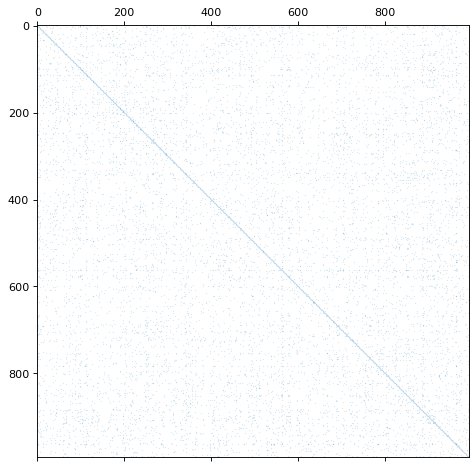

In [11]:
# Vidualize similarity between books
plt.figure(figsize=(6, 6), dpi=80)
plt.spy(book_cosine_sim, precision = 0.1, markersize = 0.04)
plt.tight_layout()
plt.show()

In [12]:
books = pd.Series(model_data['book_title'])

def recommend_books_similar_to(book_name, n=5, cosine_sim_mat=book_cosine_sim):
    # get index of the imput book
    input_idx = books[books == book_name].index[0]   
    # Find top n similar books with decreasing order of similarity score
    top_n_books_idx = list(pd.Series(cosine_sim_mat[input_idx]).sort_values(ascending = False).iloc[1:n+1].index)
    # [1:6] to exclude 0 (index 0 is the input movie itself)
    books_list = list(books)
    recommended_books = [books[i] for i in top_n_books_idx]
    return recommended_books


In [15]:
display(recommend_books_similar_to('wuthering_heights', 5))

['jane_eyre',
 'the_maze_runner',
 'the_truth_about_forever',
 'the_host',
 'sense_and_sensibility']